# Support Vector Machines

The following Support Vector Machines model is going to be studied in the dataset of Iris-Virginica contained in Scikit-Learn

## Setup

In [32]:
import numpy as np
import sys
assert sys.version_info >=(3,5)
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Load the data

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data'][:,(2,3)] #Petal length, petal width
y = (iris['target'] == 2).astype(np.float64)

For this model we are going to use a linear SVC with a Soft Margin Classification of 1

In [4]:
scaler = StandardScaler()

svm_clf = LinearSVC(C=1, loss='hinge',random_state=42)

scaled_svm_clf = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf),
])

In [5]:
scaled_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [6]:
scaled_svm_clf.predict([[5.5,1.7]])

array([1.])

So lets make the plot and find why the classificator made that prediction

In [30]:
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt

In [15]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [9]:
b1 = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b1])
svm_clf.coef_ = np.array([w1])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx1]

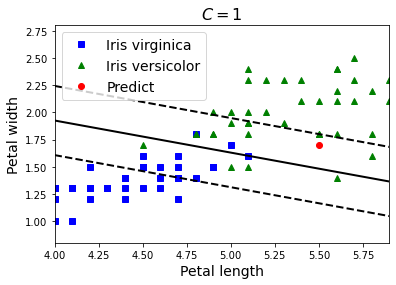

In [16]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs', label='Iris virginica')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^', label='Iris versicolor')
plt.plot(5.5,1.7,'ro', label='Predict')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left',fontsize=14)
plt.title('$C = 1$',fontsize=16)
plt.axis([4,5.9,.8,2.8])
plot_svc_decision_boundary(svm_clf,4,5.9)

As we can see the data that is predicted is in the side of the Iris versicolor

## Nonlinear SVM Classification

Now let's try to make a nonlinear SVM classification, this time using the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles. Let's use the make_moons() function.

This make_moons dataset is a swirl pattern, or two moons. It is a set of points in 2D making two interleaving half circles. It displays 2 disjunctive clusters of data in a 2-dimensional representation space (with coordinates x1 and x2 for two features)

In another words, it does not represent something in real life and it is an invented example.

In [20]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X, y = make_moons(n_samples=100,noise=0.15,random_state=42)

Let's see how the scatter plot looks like

<function matplotlib.pyplot.show(close=None, block=None)>

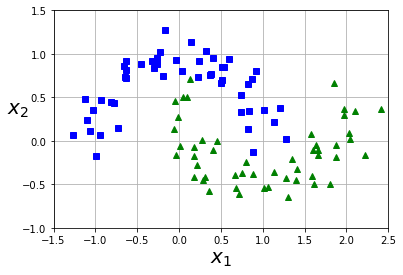

In [24]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
    
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show

Now let's generate the model.

In [25]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])

In [26]:
polynomial_svm_clf.fit(X,y)

/Users/Frank/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

Let's make a prediction

In [39]:
polynomial_svm_clf.predict([[1.0,0.0]])

array([0])

And check how does the SVM makes the classification in the non linear problem

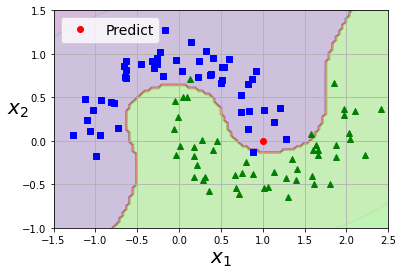

In [41]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[1],axes[2],100)
    x0, x1= np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)
    
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.plot(1.0,0.0,'ro',label='Predict')
plt.legend(loc='upper left',fontsize=14)
plt.show()

### Polynomial Kernel

When using SVM its possible to use a kernel trick, by adjusting the hyperparameters in coef0 and C as it can be seen below

In [42]:
from sklearn.svm import SVC

In [43]:
poly_kernel_svm_clf = Pipeline ([
    ('scaler',StandardScaler()),
    ('svm_clf', SVC(kernel='poly',degree=3,coef0=1,C=5))
])

In [44]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

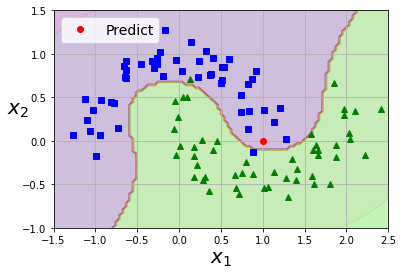

In [45]:
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.plot(1.0,0.0,'ro',label='Predict')
plt.legend(loc='upper left',fontsize=14)
plt.show()

### Gaussian RBF model

The Gaussing RBF model uses a similarity function that measures how much each instance resembles a particular landmark. The idea is to define the similarity function to be the Gaussian Radial Basis Function, this makes possible to obtain a similar result, like the one in polynomial features, as if you had added many similarity features, without actually having to add them. Let's try the Gaussian RBF kernel using the SVC class

In [46]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [47]:
rbf_kernel_svm_clf.predict([[1.0,0.0]])

array([0])

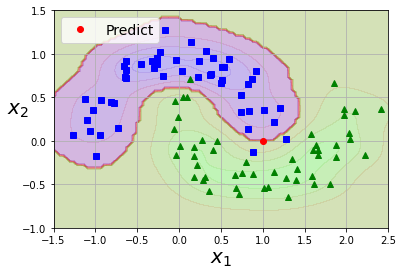

In [48]:
plot_predictions(rbf_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.plot(1.0,0.0,'ro',label='Predict')
plt.legend(loc='upper left',fontsize=14)
plt.show()

## SVM Regression

The SVM regression tries to fit as many instances as possible on the street while limiting margin violations. The width of the street is controlled by the hyperparameter $\epsilon$.

With Scikit-Learn's Linear SVR class to perform linear SVM Regression

In [49]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4 + 3 * X + np.random.randn(m,1)).ravel()

In [50]:
from sklearn.svm import LinearSVR

In [51]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5, random_state=42)

In [53]:
def find_support_vectors(svm_reg,X,y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg.support_ = find_support_vectors(svm_reg,X,y)

In [58]:
def plot_svm_regression(svm_reg,X,y,axes):
    x1s = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s,y_pred,'k-',linewidth=2,label=r'$\hat{y}$')
    plt.plot(x1s,y_pred + svm_reg.epsilon,'k--')
    plt.plot(x1s,y_pred - svm_reg.epsilon,'k--')
    plt.scatter(X[svm_reg.support_],y[svm_reg.support_],s=180,facecolors='#FFAAAA')
    plt.plot(X,y,'bo')
    plt.xlabel(r'$x_1$',fontsize=18)
    plt.legend(loc='upper left',fontsize=18)
    plt.axis(axes)

Text(0, 0.5, '$y$')

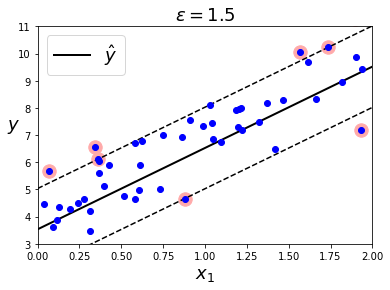

In [59]:
plot_svm_regression(svm_reg,X,y,[0,2,3,11])
plt.title(r'$\epsilon = 1.5$',fontsize=18)
plt.ylabel(r'$y$',fontsize=18,rotation=0)

### SVM nonlinear regression

For this example we're going to create a non linear function as follow

In [60]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1)/10).ravel()

(-1.0, 1.0, 0.0, 1.0)

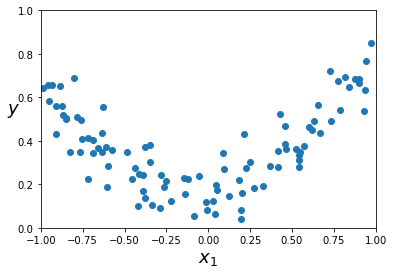

In [68]:
plt.scatter(X,y)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18, rotation=0)
plt.axis([-1,1,0,1])

Now let's create the model using Scikit-Learn's SVR class. The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class.

In [69]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

Text(0, 0.5, '$y$')

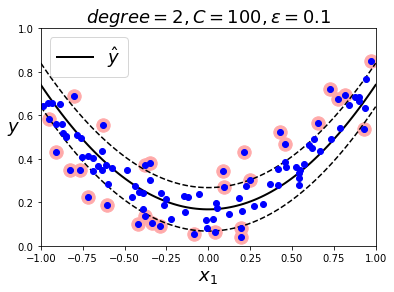

In [71]:
plot_svm_regression(svm_poly_reg,X,y,[-1,1,0,1])
plt.title('$degree=2, C=100, \epsilon = 0.1$',fontsize=18)
plt.ylabel('$y$',fontsize=18,rotation=0)